# テーブルデータ分析テンプレート

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font="IPAexGothic")
import lightgbm as lgb
from sklearn.model_selection import train_test_split

from lib.data_loader import load_dataset
from lib.metrics import CalcMetrics

## データセットの読み込み

データセットをpandas.DataFrameへ読み込む．  
本テンプレートでは，トイデータとしてカリフォルニア住宅価格予測用データセットを使用する．

In [3]:
x_data, y_data = load_dataset()

In [4]:
x_data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [5]:
y_data

,TARGET
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422
...,...
20635,0.781
20636,0.771
20637,0.923
20638,0.847


## 欠損値確認

In [6]:
x_data.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64

## ヒストグラム

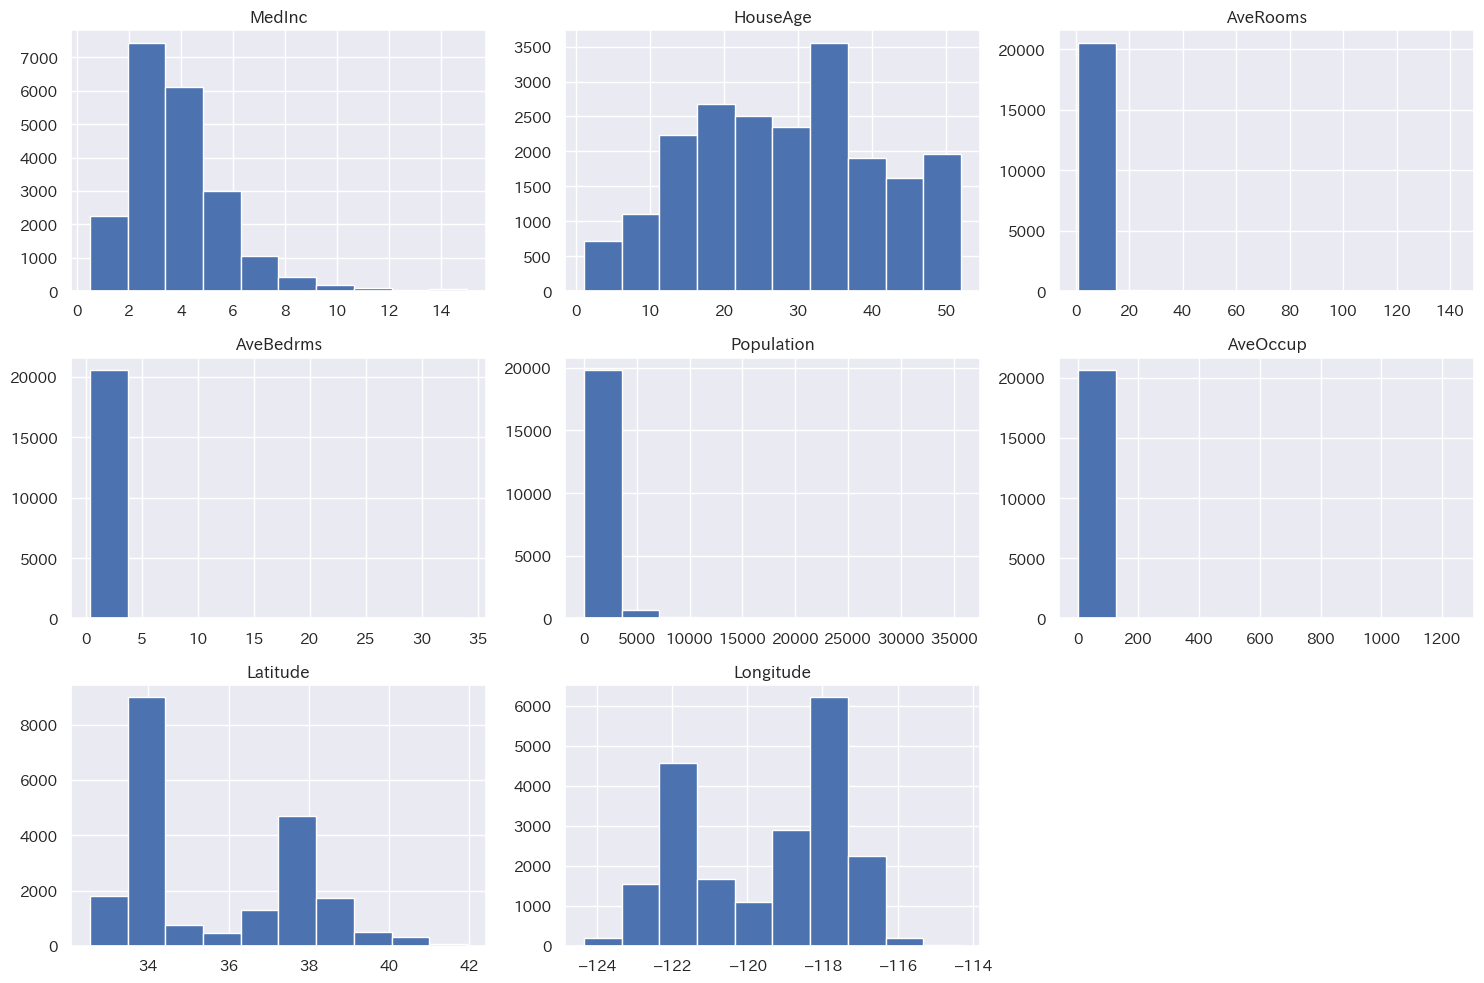

In [7]:
float_cols = x_data.columns[x_data.dtypes=='float64']
hist_data = x_data[float_cols]

hist_data.hist(figsize=(15, 10))
plt.tight_layout()
plt.show()
plt.close()

## LightGBMによる学習処理サンプル

### 学習用とテスト用で分割

In [8]:
train_x, test_x, train_y, test_y = train_test_split(x_data, y_data, test_size=0.3, random_state=0)

### 学習

In [9]:
SEED = 0

params = {
    'objective': 'regression',
    'metric': 'mae',
    'num_leaves': 32,
    'max_depth': 4,
    "feature_fraction": 0.5,
    'subsample_freq': 1,
    "bagging_fraction": 0.8,
    'min_data_in_leaf': 5,
    'learning_rate': 0.01,
    "boosting": "gbdt",
    "lambda_l1": 1,
    "lambda_l2": 5,
    "verbosity": -1,
    "random_state": 42,
    "num_boost_round": 50000,
    "early_stopping_rounds": 100
}

train_data = lgb.Dataset(train_x, label=train_y)
test_data = lgb.Dataset(test_x, label=test_y)

model = lgb.train(
    params,
    train_data, 
    valid_names = ['train', 'test'],
    valid_sets =[train_data, test_data], 
    verbose_eval = 100,
)

/usr/local/lib/python3.8/dist-packages/lightgbm/engine.py:177: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/usr/local/lib/python3.8/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
[100]	train's l1: 0.614551	test's l1: 0.623398
[200]	train's l1: 0.491945	test's l1: 0.504242
[300]	train's l1: 0.433251	test's l1: 0.448156
[400]	train's l1: 0.40365	test's l1: 0.420082
[500]	train's l1: 0.381367	test's l1: 0.398199
[600]	train's l1: 0.367856	test's l1: 0.38524
[700]	train's l1: 0.35869	test's l1: 0.376843
[800]	train's l1: 0.351349	test's l1: 0.37023
[900]	train's l1: 0.345242	test's l1: 0.364873
[1000]	train's l1: 0.339712	test's l1: 0.360077
[1100]	train's l1: 0.335192	test's l1: 0.356608
[1200]	train's l1: 0.330112	test's l1: 0.352436
[1300]	train's l1: 0.326081	test's l1: 0.349187
[1400]	train's l1: 0.322406	test's l1: 0.346316
[1500]	train's l1: 0.319095	test's l1: 0.343704
[1600]	train's l1: 0.316347	test's l1: 0.341861
[1700]	train's l1: 0.313326	test's l1: 0.339696
[1800]	train's l1: 0.310584	test's l1: 0.337622
[1900]	train's l1: 0.308101	test's l1: 0.335971
[2000]	train's l1: 0.305557	test's l1: 

### 特徴量の重要度を表示

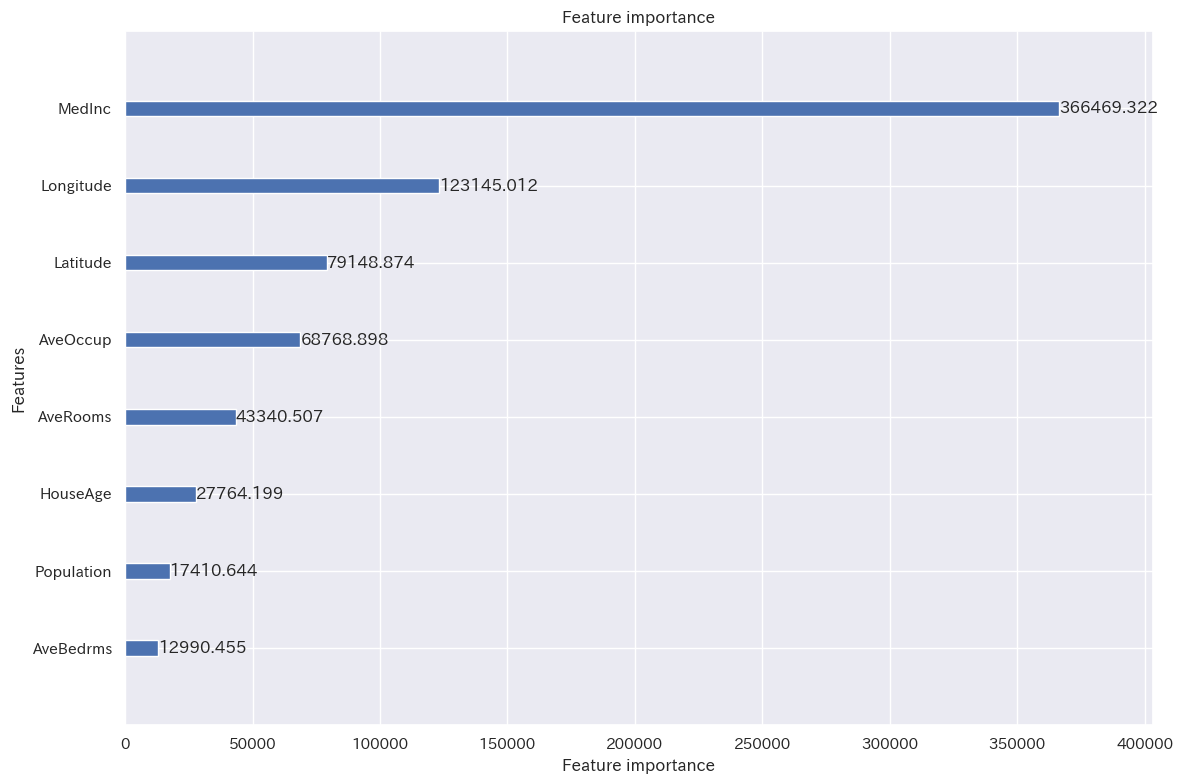

In [10]:
lgb.plot_importance(model, figsize=(12,8), max_num_features=50, importance_type='gain')
plt.tight_layout()
plt.show()
plt.close()

## Calculate Metrics

In [11]:
train_pred = model.predict(train_x)
test_pred = model.predict(test_x)

In [12]:
train_metrics = CalcMetrics(train_y, train_pred)
test_metrics = CalcMetrics(test_y, test_pred)

### MAE

In [13]:
print(f'MAE train data: {train_metrics.mae:.3f}')
print(f'MAE test data: {test_metrics.mae:.3f}')

MAE train data: 0.216
MAE test data: 0.297


### MSE

In [14]:
print(f'MSE train data: {train_metrics.mse:.3f}')
print(f'MSE test data: {test_metrics.mse:.3f}')

MSE train data: 0.096
MSE test data: 0.201


### R2 Score

In [15]:
print(f'R2 train data: {train_metrics.r2_score:.3f}')
print(f'R2 test data: {test_metrics.r2_score:.3f}')

R2 train data: 0.917
R2 test data: 0.820
